# Background and Context
AllLife Bank is a bank operating in the United States. With different-sized accounts, its growing customer consists mainly of depositors, also known as liability customers. The bank also currently has a small customer base of asset customers that borrow money, and it seeks to increase the size of this segment to gain more interest from loan repayment.
The Banks particular interest lies in converting its liability customers into borrowers while maintaining them as depositors. 
The motivation to pursue this strategy comes from a previous campaign targeted at liability customers that showed a conversion rate of over 9% success.

### Our Goal
Develop a model to aid marketing in identifying potential customers with a higher probability of purchasing a loan.

### Objective

* To predict whether or not a liability customer will purchase a personal loan.
* Which variables are most significant in determining the above.
* Identification of which customers worth targeting for higher responses rates with loan acceptance and higher probabilities for loan repayment.

### Data Dictionary
* **ID:** Customer ID
* **Age:** Customer’s Age in completed years
* **Experience:** Years of professional experience
* **Income:** Customers annual income (USD 000's)
* **ZIP Code:** Home Address ZIP code
* **Family:** Family size of the customer
* **CCAvg:** Average monthly spending on credit cards (USD 000's)
* **Education:** Customers Education Level. 1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional
* **Mortgage:** Value of customers house mortgage if any. (USD 000'S)
* **Personal_Loan:** Customer accepted loan in previous campaign?
* **Securities_Account:** Does the customer have a securities account with the bank?
* **CD_Account:** Does the customer have a certificate of deposit (CD) account with the bank? 
* **Online:** Does the customer use internet banking facilities?
* **CreditCard:** Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [644]:
# Data wrangling liibraries
import numpy as np
import pandas as pd

# Set our display limits for rows and colmns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

# For visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To split the data
from sklearn.model_selection import train_test_split 

# To build our regression model
from sklearn.linear_model import LogisticRegression

# For our decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# To build our linear model for stat. analysis and predction 
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# To get scores for our models
from sklearn import metrics
from sklearn.metrics import (f1_score, recall_score, accuracy_score, precision_score,
                             roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve)

In [645]:
# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

# Load and Explore the Data

In [646]:
# import the data, create a copy to work with, and check the shape of the data

data = pd.read_csv('C:/Users/ffpch/Desktop/PGP-DSBA/SL - Classification/Loan_Modelling.csv')
d = data.copy()
d.shape

(5000, 14)

There are 14 columns and 5000 rows in the data

#### View a sample of rows from the data 

In [647]:
np.random.seed(1)
d.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0


#### View data types of our columns

In [648]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations**

* There are 14 columns in our dataset as expected 
* There are no null values, so this is good

#### Inspect unique values in each column

In [649]:
d.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

**Observations**

* All our ID's are unique - We'll drop this column as it adds no value to our model
* Our ZIPCode column isn't currently in a form that's manageable for our goals here so we'll drop.


In [650]:
# drop the ID column 

d.drop('ID', axis = 1, inplace = True)
d.drop('ZIPCode', axis = 1, inplace = True)

In [651]:
# we're using the search module to map zip codes to counties and then collecting those into an array

#from uszipcode import SearchEngine
#search = SearchEngine()

#County = []
#for code in range(len(d['ZIPCode'])):
    #zipcode = search.by_zipcode(d['ZIPCode'][code])
    #County.append(zipcode.county)

In [652]:
# we're creating a new column using the output of our mappings to the counties, in the previous step - "County" column

#d['County'] = County
#d['County'] = d['County'].str.replace('County','') # removing the word "county" as its redundant here
#d.head()

Let's have another look at data types

In [653]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


We notice a view data types that will work better as categories

We'll convert them and view category counts

In [654]:
pre_cat = ['Education','Personal_Loan','Securities_Account','CD_Account','CreditCard','Online','Family'] 
for col in pre_cat:
    d[col] = d[col].astype('category')
    
catcols = pre_cat # our categorical columns
for col in pre_cat:
    """Print the column name,
    print the value counts,
    then print dividers"""
    print(f'\033[1m'+ '\033[36m' +  col + '\033[0m')
    print(d[col].value_counts())
    print('-'*40)

Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
----------------------------------------
Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64
----------------------------------------
Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64
----------------------------------------
CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64
----------------------------------------
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
----------------------------------------
Online
1    2984
0    2016
Name: Online, dtype: int64
----------------------------------------
Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
----------------------------------------


* Majority of customers are educated at the Undergrad Level (1), followed by Graduate (2), then Advanced(3)
* Most customers did not accept the personal loan in the first campaign ( > 90% | Personal_Loan category "0" )
* Most customers do not have a Securities_Account with the bank (~ 90%)
* Most customers do not have a certificate of deposit (CD) account with the bank (~ 94%)
* Most customers do not use a credit card issued by a Bank different from All-life Bank (> 70%)
* Majority of customers use internet banking facilities 
* Majority of customers have family size of 1 but size 2 and 3 are vlose behind

#### Let's view a data summary of all our columns before be start to visulize

In [655]:
d.describe(include = 'all').fillna('-').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,-,-,-,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,-,-,-,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,-,-,-,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,4.0,1.0,1472.0,-,-,-,-,-,-,-
CCAvg,5000.0,-,-,-,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,3.0,1.0,2096.0,-,-,-,-,-,-,-
Mortgage,5000.0,-,-,-,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,2.0,0.0,4520.0,-,-,-,-,-,-,-
Securities_Account,5000.0,2.0,0.0,4478.0,-,-,-,-,-,-,-
CD_Account,5000.0,2.0,0.0,4698.0,-,-,-,-,-,-,-


There are negative values in the Experience column. This is not naturally possible so we'll need to work on these

In [656]:
# view rows with negative Experience

d.loc[d.Experience < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


In [657]:
# we're replacing the negative values observed above with #NaN

d.Experience.replace([-3,-2,-1],np.nan,inplace = True)
d.Experience.replace(np.nan,d.Experience.mean(),inplace = True)
d[d.Experience < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [658]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.000000,55.0,67.0
Experience,5000.0,20.331043,11.252985,0.0,11.0,20.331043,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.000000,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.500000,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.000000,101.0,635.0


Let's check our data types again

In [659]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   float64 
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(2), int64(3)
memory usage: 230.6 KB


Everything looks alright for now

# 2 - Exploratory Data Analysis

## Univariate

In [660]:
# we're creating a function to plot a histogram and boxplot of our features
# we can pass any of our numeric columns as input


def histbox(col,bins = None):
    # create the plot
    fig,(axb,axh) = plt.subplots(gridspec_kw = {"height_ratios" : (0.25,0.75)}, nrows = 2, sharex = True, figsize = (11,9))
    
    # define properties for the point used to mark the mean position on the box plot
    meanpointprops = dict( marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
    
    # create the boxplot
    sns.boxplot(x = col, ax=axb, width = 0.5, linewidth = 1.2, color = '#8DB7E5', 
                showmeans = True, meanprops = meanpointprops) 
    
    # show vertical mean line
    axb.axvline(col.mean(), color = '#d2624f', linestyle = 'solid', linewidth = 1, label = 'Mean')  
    # show vertical median line
    axb.axvline(col.median(), color = 'black', linestyle = 'dashed', linewidth = 1, label = 'Median')  
    
    # create the histogram
    sns.distplot(col, ax=axh, kde=False, color = '#8DB7E5', bins = bins) 

    # show the average line 
    axh.axvline(col.mean(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Mean') 
    # show the median line 
    axh.axvline(col.median(), color='black', linestyle='dashed', linewidth = 1, label = 'Median')
    
    sns.set(font_scale = 1.1, font = 'Montserrat', style = 'darkgrid')
    
    plt.legend(loc = 'upper right')
    
    #plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR1-PRICE.png', pad_inches=0)
    
    # print measures of central tendency for specified column
    print('\033[1m'+ '\033[36m' + str(col.name)+ '\033[0m') 
    print('-'* 15)
    print('Mean: ',round(col.mean(),2))
    print('Median: ',round(col.median(),2))
    
    plt.show()
   
    

#### Let's begin to call our funtion to help visualize our numeric columns

Age
---------------
Mean:  45.34
Median:  45.0


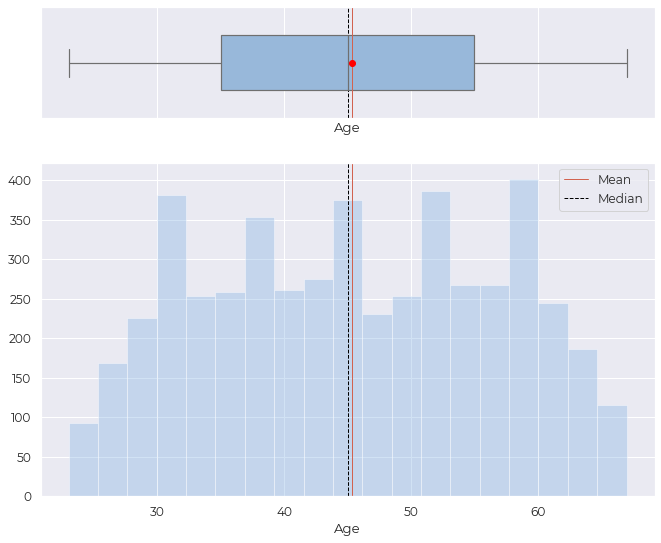

In [661]:
histbox(d['Age'])

**Observations**

* The median and mean Age of customers are close to each other (45) and there isn't any significant skew in either direction


Experience
---------------
Mean:  20.33
Median:  20.33


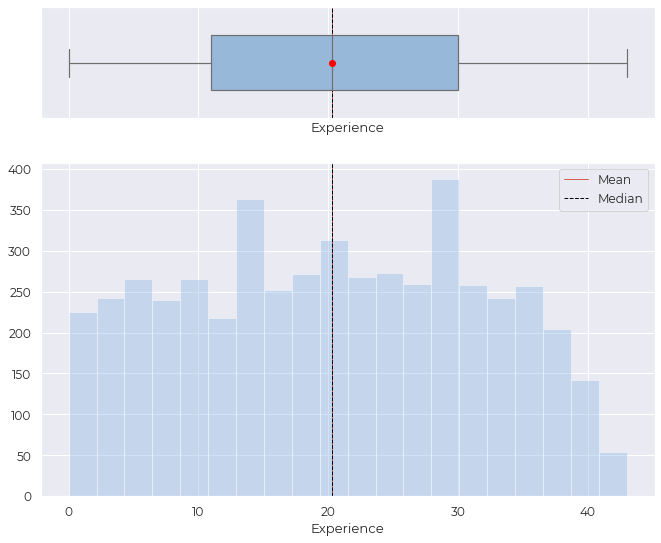

In [662]:
histbox(d['Experience'])

**Observations**

* The median and mean years of Experience are close to each other (20) and there isn't any significant skew in either direction

Income
---------------
Mean:  73.77
Median:  64.0


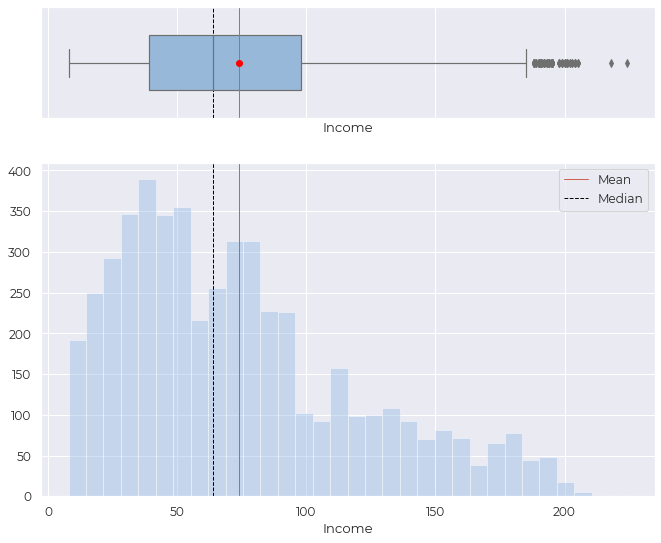

In [663]:
histbox(d['Income'])

**Observations**

* The mean income is ~ USD 74k and the median is USD 64K
* The customers' income is right skewed due to a few individuals that earn between ~ USD 100K and ~USD 200K which is relatively more than median (and mean)

CCAvg
---------------
Mean:  1.94
Median:  1.5


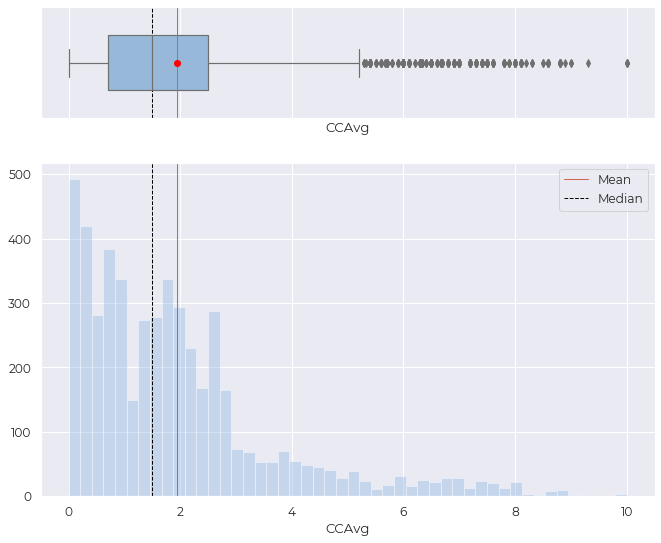

In [664]:
histbox(d['CCAvg'])

**Observations**

* The customers' average  monthly credit card spend is USD 1940 and the median is USD 1500
* A few customers seem to spend a relatively higher amount monthly - starting around USD 3000 per month we see some outliers, all the way up to the customer that spends roughly USD 10K monthly

Mortgage
---------------
Mean:  56.5
Median:  0.0


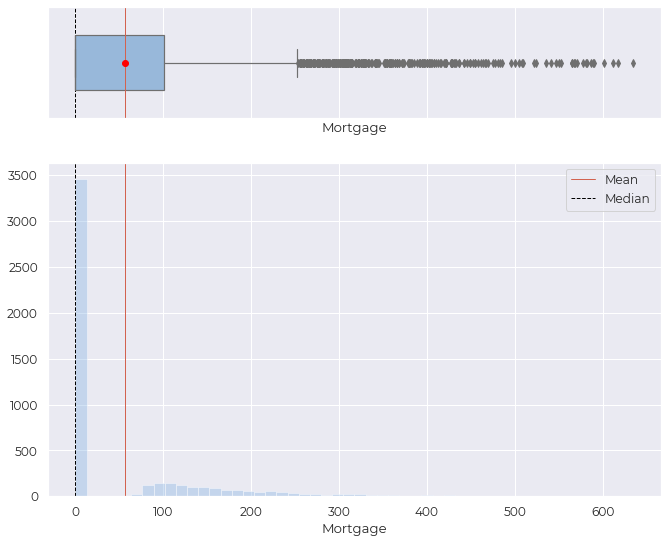

In [665]:
histbox(d['Mortgage'])

**Observations**

* A large amount of customers seems to have USD 0.0 Mortgage balance 

In [666]:
print(str(round((len(d[d["Mortgage"] == 0.0])/len(d))*100,1)) + '% of customers have a USD 0.0 Mortgage balance')

69.2% of customers have a USD 0.0 Mortgage balance


* The customers that do have mortgages have them in the USD 100K's to around the USD 300K's
* The data is right skewed by customers that have mortgages, since most do not have them

#### We will create countplots to explore the distribution of our categorical variables 

In [667]:
# function to label our plot

def plotcat (plot, col):
    
    for p in g.patches:
        
        tot = len(col)
        perc = "{:.0f}%".format((p.get_width()/tot) * 100)
        
        x = 50
        y = p.get_height()/2 + 0.08 + p.get_y()
        
        g.annotate(perc,(x,y),fontsize = 13, color ='white')
      

In [668]:
 d.select_dtypes(include = "category").columns

Index(['Family', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

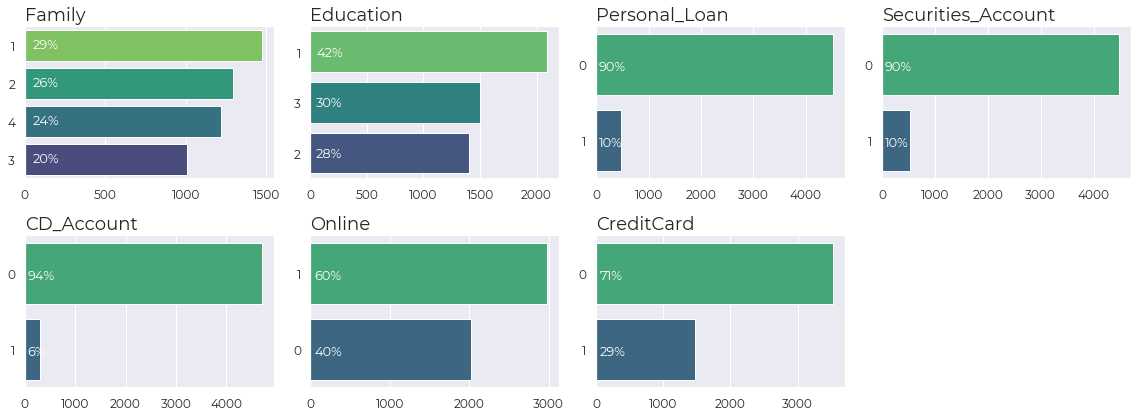

In [428]:
# get our categorical columns into a list so we can run a loop
catcols = d.select_dtypes(include = "category").columns.to_list()

plt.figure(figsize = (16,6))

# we're using a "for" loop to apply our defined function ot the columns
for i, catcol in enumerate(catcols):
    plt.subplot(2, 4, i + 1) # create the sub plots for each column : 2 rows, 4 cols
    order = d[catcol].value_counts().sort_values(ascending = False).index.values # to sort the bars
    
    g = sns.countplot(y = d[catcol], order = order, palette = 'viridis_r')
    
    
    plt.title(catcol, fontsize = 18, loc ='left', fontweight ="medium")
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plotcat(g, d[catcol])




### Observations on Categorical columns

* Most customer have family size of one, one year of Education, no securities account with the bank and did not take the personal loan in the first campaign

* Most customers do not have a certificate of deposit account with the bank. Most use online banking, and do not have a credit card issued by another other Bank different from All life Bank


## Bivariate and Multivariate 

### Correlation Matrix

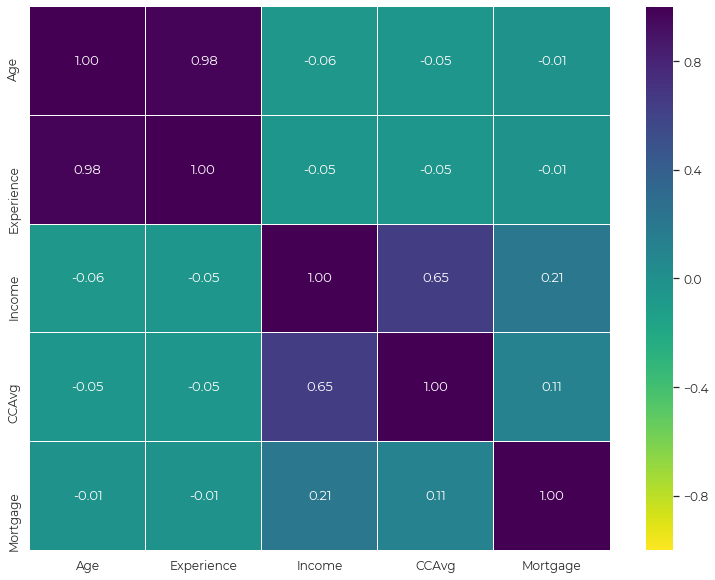

In [669]:
# Get the correlation values then plot a heatmap to explore correlation between columns/features

corr = d.corr() # create the correlation matrix
plt.figure(figsize=(13,10)) # set the figure size


sns.heatmap(corr, annot = True, cmap = 'viridis_r', linecolor='white', linewidths=0.01, 
            fmt='.2f', vmin = -1, vmax = 1)
plt.show()

Age and Experience are correlated so we'll drop one before we model since we now we'll need to avoid multicollinearity.

### Person_Loan by Age
Personal_Loan refers to whether the customer took the personal loan in the previous campaign

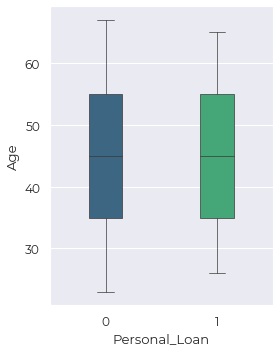

In [430]:
# we're plotting a box plot to help explore the yes (1) and no's (0) across ages

plt.figure(figsize = (4,5.5))
sns.boxplot(x = "Personal_Loan", y = "Age", data = d, palette="viridis", width = 0.3, linewidth = 0.7)
plt.show()

**Observation** - Age does not seem to matter in determining who accepted loans. The median age is the same (~45) and the variability in customers who took, and those who didn't take loans, is similar

### Personal_Loan by Income

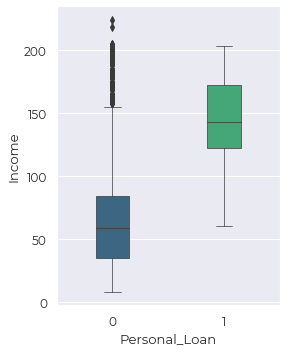

In [431]:
# we're creating a boxplot to explore the income of those who took vs those that did not take the loan

plt.figure(figsize = (4,5.5))
sns.boxplot(x = "Personal_Loan", y = "Income", data = d, palette="viridis", width = 0.3, linewidth = 0.7)
plt.show()

**Observations** 

* The median income of customers who took the loan in the previous campaign is significantly higher than those that did not - a little under USD 150K vs a little above USD 60K
* There are some "outlier" customers that did not take the loan but have very high incomes > USD 150K
* We won't treat these outliers as they do represent valuable customer data

In [432]:
# we're creating box plots to explore the income of clients who did and didn't take the loan, across our regions

#plt.figure(figsize = (12,6)) # set size 

#sns.boxplot(x = 'Region', y = 'Income', hue = 'Personal_Loan', palette = 'viridis', data = d, width = 0.4, linewidth = 0.7) 
#plt.legend(loc = 'upper right')
#lt.show()

### Personal_Loan by Family and CCAvg

* Family: Family size of the customer
* CCAvg: Average monthly spending on credit cards (USD 000's)

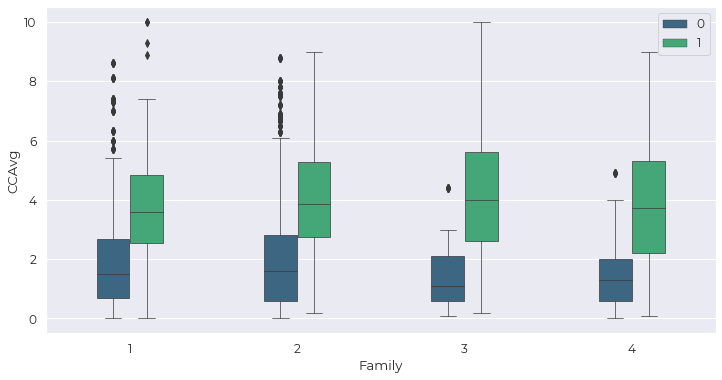

In [433]:
# we're creating box plots to explore the family size 
# and average monthly credit card balance of those that did and didn't take the loan 

plt.figure(figsize = (12,6)) # set size 

sns.boxplot(x = 'Family', y = 'CCAvg', hue = 'Personal_Loan', palette = 'viridis', data = d, width = 0.4, linewidth = 0.7) 
plt.legend(loc = 'upper right')
plt.show()

* The Average spending on credit cards per month is higher in those that took the previous loan, across all family sizes
* Of customers that did not take the loan in the previous campaign, there are some with 1 or 2 family members that have much higher monthly spending amounts than those with 3 and 4 family members

#### We will use stacked bar plots to help us explore any more patterns observed in customers whoo took the personal loan in the previous campaign

#### Create the function 

In [434]:
# we're creating a function to help us show a crosstab of the passed column and the Personal_Loan column,
# and then visualize the ratios using a stacked plot

def stackedbar(x):
    # show crosstab
    tabs = pd.crosstab(x,d['Personal_Loan'],margins = True)
    print('\033[1m'+ '\033[36m' + str(x.name)+ '\033[0m')
    print('-'*35)
    print(tabs)
    print('-'*70)
    
    # plot stacked bar
    sns.set(palette = 'viridis', font = 'Montserrat', font_scale = 1.1)
    tab = pd.crosstab(x, d['Personal_Loan'], normalize = "index")
    tab.plot(kind = "bar",stacked = True, figsize = (6,4))
    plt.legend(loc = "best")

#### We'll begin to call the function with the relevant columns we want to explore

### Personal_Loan by Education

Education
-----------------------------------
Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
----------------------------------------------------------------------


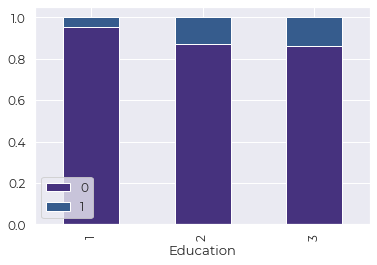

In [435]:
stackedbar(d['Education'])

**Observations** - Customers with category 3 education (Advanced/Professional), contirbute the most to the group of customers that took the personal loan in the previous campaign. Those with category 2, or Graduate level education also contribute a significant amount to the group that accepted personal loans previously. Those with category 1 (Undergrad level) education made up a very small portion of the group.

### Personal_Loan by Family Size

Family
-----------------------------------
Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
----------------------------------------------------------------------


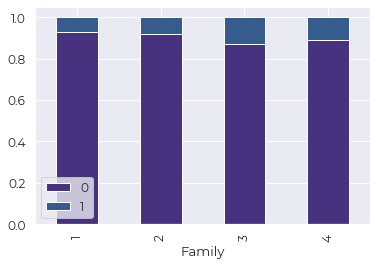

In [436]:
stackedbar(d['Family'])

**Observations** - Customers with family size of 4 contribute the most to the group of customers that accepted a personal loan in the previous campaign. Customers with family size of 3 had almost the same contribution to the group that took a personal loan. The portions of those with family size 1 and 2 that took the loan are not insignificant either, and they contributed an equal number to those that took the loan.

### Personal_Loan by Securities_Account

Securities_Account : Whether or not the customer has a securities account with ALL Life Bank

Securities_Account
-----------------------------------
Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
----------------------------------------------------------------------


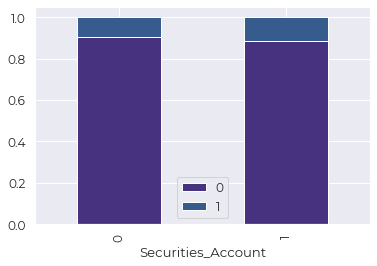

In [437]:
stackedbar(d['Securities_Account'])

**Observations** - A very small portion of customers that took the previous loan offer also have a securities account with the bank. Overall, of those that did take the personal loan previously, majority do not have a securities account. 

### Personal_Loan by CD_Account

 CD_Account : Whether or not the customer has a certificate of deposit (CD) account with the bank

CD_Account
-----------------------------------
Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
----------------------------------------------------------------------


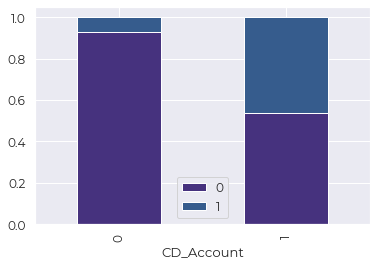

In [438]:
stackedbar(d['CD_Account'])

**Observations** - Of the customers that took the personal loan previously, most do not have a certificate of deposit account

### Personal_Loan by Online

Online : Whether or not a customers uses internet banking facilities

Online
-----------------------------------
Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
----------------------------------------------------------------------


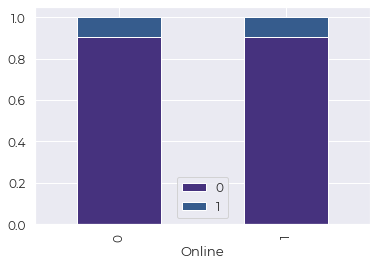

In [439]:
stackedbar(d['Online'])

**Observations** - Customers who use internet banking contribute more to the group of users than took the personal loan than those that don't use internet banking. However, the proportion of users that took the loan previously is similar across both categories of customers

### Personal_Loan by CreditCard

CreditCard : Whether or not the customer uses a credit card issued by any other Bank than All life Bank

CreditCard
-----------------------------------
Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
----------------------------------------------------------------------


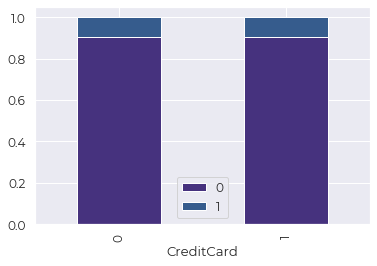

In [440]:
stackedbar(d['CreditCard'])

**Observations** - Customers who don't have a credit card with another bank contribute more to the group of users that took the personal loan than those that do. However, the proportion of users that took the loan previously is similar across those that do and those that don't have a credit card with a different bank

#### Personal_Loan - Distribution of Targets

In [441]:
print( str(d['Personal_Loan'].value_counts()[0]/len(d.index)*100)+ " % "+ "of customers did not take the personal loan")

90.4 % of customers did not take the personal loan


The weights of targets are imbalanced - We'll decide whether to address this later after doing some modelling

# 3 - Data Preparation

In [ ]:
Let's run through and check data types, null values, unique values and drop columns

In [442]:
d.describe(include = 'all').fillna("--").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,--,--,--,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,--,--,--,20.331043,11.252985,0.0,11.0,20.331043,30.0,43.0
Income,5000.0,--,--,--,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,4.0,1.0,1472.0,--,--,--,--,--,--,--
CCAvg,5000.0,--,--,--,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,3.0,1.0,2096.0,--,--,--,--,--,--,--
Mortgage,5000.0,--,--,--,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,2.0,0.0,4520.0,--,--,--,--,--,--,--
Securities_Account,5000.0,2.0,0.0,4478.0,--,--,--,--,--,--,--
CD_Account,5000.0,2.0,0.0,4698.0,--,--,--,--,--,--,--


In [443]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   float64 
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(2), int64(3)
memory usage: 398.5 KB


In [444]:
d.drop('Experience', axis = 1, inplace = True) # dropping this to avoid multicollinearity

In [446]:
d.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

# 4 - Model Building

We'll begin to model now.

Steps:
* Prepare the data
* Split it into training and testing data sets
* Build a CART model using training data
* Tune our model as needed
* Test our model on the testing data 

## Split the data 

In [448]:
X = d.drop('Personal_Loan', axis = 1)
X = pd.get_dummies(X,drop_first=True,columns = ['Education','Family'] )
X = add_constant(X)

y = d['Personal_Loan'].astype('int64')

# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1 )
print(f'The shape of the training datadet is : {X_train.shape}')
print("-"*50)
print('Training Sample')
print("-"*50)
X_train.head(5)

# view a sample

The shape of the training datadet is : (3500, 14)
--------------------------------------------------
Training Sample
--------------------------------------------------


,const,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
1334,1.0,47,35,1.3,0,0,0,1,0,0,0,1,0,0
4768,1.0,38,39,2.0,0,0,0,1,0,1,0,0,0,0
65,1.0,59,131,3.8,0,0,0,1,1,0,0,0,0,0
177,1.0,29,65,1.8,244,0,0,0,0,1,0,0,0,1
4489,1.0,39,21,0.2,0,0,0,1,0,1,0,0,1,0


Let's inspect the proportion of customers that took the personal loan in our different data splits

In [450]:
print( "Original Set - Customers that took the personal loan        :", len(d.loc[d['Personal_Loan'] == 1]), "(", round((len(d.loc[d['Personal_Loan'] == 1])/len(d) * 100),2),"%",")")
print( "Original Set - Customers that didn't take the personal loan :", len(d.loc[d['Personal_Loan'] == 0]), "(", round((len(d.loc[d['Personal_Loan'] == 0])/len(d) * 100),2),"%",")")
print("*"*80)
print( "Training Set - Customers that took the personal loan        :","(", round(((len(y_train[y_train[:] == 1])/len(y_train)) * 100),2) ,"%",")" )
print( "Training Set - Customers that didn't take the personal loan :","(", round(((len(y_train[y_train[:] == 0])/len(y_train)) * 100),2) ,"%",")" )
print("*"*80)
print( "Testing Set - Customers that took the personal loan        :","(", round(((len(y_test[y_test[:] == 1])/len(y_test)) * 100),2) ,"%",")" )
print( "Testing Set - Customers that didn't take the personal loan :","(", round(((len(y_test[y_test[:] == 0])/len(y_test)) * 100),2) ,"%",")" )


Original Set - Customers that took the personal loan        : 480 ( 9.6 % )
Original Set - Customers that didn't take the personal loan : 4520 ( 90.4 % )
********************************************************************************
Training Set - Customers that took the personal loan        : ( 9.46 % )
Training Set - Customers that didn't take the personal loan : ( 90.54 % )
********************************************************************************
Testing Set - Customers that took the personal loan        : ( 9.93 % )
Testing Set - Customers that didn't take the personal loan : ( 90.07 % )


## Logistic Regression

#### I - Let us create a function to help us create a confusion matrix of our actual and predicted values

In [451]:
# for sklearn

def make_confusion_matrix(model,X_test,y_actual,labels=[1, 0]):
    
    y_predict = model.predict(X_test) # make predictions
    
    cm = metrics.confusion_matrix(y_actual, y_predict, labels = [0,1]) # Create confusion Matrix
    
    # create dataframe of values of predicted and actual
    dcm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]] , 
                      columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    counts = ['{0:0.0f}'.format(val) for val in cm.flatten()] # counts
    percs = ['{0:.1%}'.format(val) for val in cm.flatten()/np.sum(cm)] # percentges
    
    # label matrix
    labels = [f'{a}\n{b}' for a, b in zip(counts, percs)]
    labels = np.array(labels).reshape(2,2)
    
    # plot heat map
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot = labels, fmt = '')
    
    plt.ylabel('TRUE LABEL', fontsize = 12)
    plt.xlabel('PREDICTED LABEL', fontsize = 12)

In [452]:
# for stats model - does same as above but we specify a threshold

def make_confusion_matrix2(model,X_test,y_actual,labels=[1, 0],threshold = 0.5):
    
    y_predict = model.predict(X_test)>threshold
    
    cm = metrics.confusion_matrix(y_actual, y_predict, labels = [0,1])
    dcm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]] , 
                      columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    counts = ['{0:0.0f}'.format(val) for val in cm.flatten()]
    percs = ['{0:.1%}'.format(val) for val in cm.flatten()/np.sum(cm)]
    
    labels = [f'{a}\n{b}' for a, b in zip(counts, percs)]
    labels = np.array(labels).reshape(2,2)
    
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot = labels, fmt = '')
    
    plt.ylabel('TRUE LABEL', fontsize = 12)
    plt.xlabel('PREDICTED LABEL', fontsize = 12)

#### II - Let's create second function to help us print our model scores

In [453]:
# for sklearn

def print_metrics (model, xtrain, xtest, ytrain, ytest): 
    
    # use model to predict on training and testing data to compare performance
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    
    # show our model performance scores
    print('\033[1m'+'Model Performance' + '\033[36m'+'\033[0m')
    print('-'*40)
    print("Accuracy on the training set : ",round(accuracy_score(train_pred,ytrain),4))
    print("Accuracy on the test set : ",round(accuracy_score(test_pred,ytest),4))
    print('-'*40)
    print("Recall on the training set : ",round(recall_score(train_pred,ytrain),4))
    print("Recall on the  test set : ",round(recall_score(test_pred,ytest),4))
    print('-'*40)
    print("Precision on the training set : ",round(precision_score(train_pred,ytrain),4))
    print("Precision on the test set : ",round(precision_score(test_pred,ytest),4))
    print('-'*40)
    print("F1 on the training set : ",round(f1_score(train_pred,ytrain),4))
    print("F1 on the test set : ",round(f1_score(test_pred,ytest),4))
    


In [454]:
# for stats model

def print_metrics2 (model, xtrain, xtest, ytrain, ytest, threshold=0.5):
    
    # use model to predict on training and testing data to compare performance
    train_pred = (model.predict(xtrain)>threshold)
    test_pred = (model.predict(xtest)>threshold)
   
    # show our model performance scores
    print('\033[1m'+'Model Performance' + '\033[36m'+'\033[0m')
    print('-'*40)
    print("Accuracy on the training set : ",round(accuracy_score(train_pred,ytrain),4))
    print("Accuracy on the test set : ",round(accuracy_score(test_pred,ytest),4))
    print('-'*40)
    print("Recall on the training set : ",round(recall_score(train_pred,ytrain),4))
    print("Recall on the  test set : ",round(recall_score(test_pred,ytest),4))
    print('-'*40)
    print("Precision on the training set : ",round(precision_score(train_pred,ytrain),4))
    print("Precision on the test set : ",round(precision_score(test_pred,ytest),4))
    print('-'*40)
    print("F1 on the training set : ",round(f1_score(train_pred,ytrain),4))
    print("F1 on the test set : ",round(f1_score(test_pred,ytest),4))
    

### Let's build a base model with sklearn to explore outcomes

Model Performance
----------------------------------------
Accuracy on the training set :  0.9603
Accuracy on the test set :  0.95
----------------------------------------
Recall on the training set :  0.9034
Recall on the  test set :  0.9022
----------------------------------------
Precision on the training set :  0.6495
Precision on the test set :  0.557
----------------------------------------
F1 on the training set :  0.7557
F1 on the test set :  0.6888


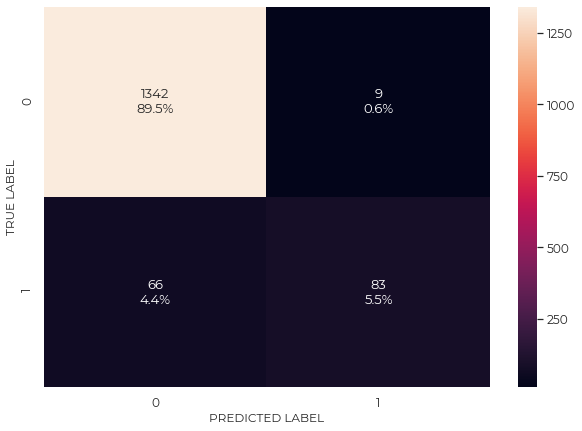

In [455]:
# create the model

logis = LogisticRegression(solver = 'newton-cg', random_state = 1,fit_intercept=False)
mod = logis.fit(X_train,y_train)

# create a confusion matrix using our function
make_confusion_matrix(mod,X_test,y_test)

# print the model performance
print_metrics(mod, X_train,X_test,y_train,y_test)

* The sklearn  model shows good performance on our testing and training data, and we'll proceed to use statsmodel in order identify what customer features are important
* This enables us to test the statistical validity of the model that's been built

### Let's build another model with statsmodel to explore outcomes

In [456]:
logit = sm.Logit(y_train,X_train.astype(float))
lg = logit.fit(warn_convergence=False)

#make_confusion_matrix2(lg,X_test,y_test)

scores_LR = print_metrics2(lg,X_train,X_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.107513
         Iterations 10
Model Performance
----------------------------------------
Accuracy on the training set :  0.9623
Accuracy on the test set :  0.9573
----------------------------------------
Recall on the training set :  0.8812
Recall on the  test set :  0.9126
----------------------------------------
Precision on the training set :  0.6949
Precision on the test set :  0.6309
----------------------------------------
F1 on the training set :  0.777
F1 on the test set :  0.746


In [457]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6565
Time:                        22:35:30   Log-Likelihood:                -376.30
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.458e-300
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.5484      0.839    -16.143      0.000     -15.193     -11.903
Age                    0.0052      0.009      0.607      0.544      -0.012       0.022
Income                 0.0628      0.004     16.378      0.000       0.055       0.070
CCAvg                  0.2466      0.058      4.243      0.000       0.133       0.360
Mortgage               0.0009      0.001      1.221      0.222      -0.001       0.002
Securities_Account    -1.0693      0.406     -2.636      0.008      -1.864      -0.274
CD_Account             3.7096      0.437      8.483      0.000       2.853       4.567
Online                -0.5853      0.206     -2.842      0.004      -0.989      -0.182
CreditCard            -0.9980      0.270     -3.702      0.000      -1.526      -0.470
Education_2            4.0039      0.347     11.544      0.000       3.324       4.684
Education_3            4.2663      0.345     12.352      0.000       3.589       4.943
Family_2               0.0316      0.291      0.108      0.914      -0.539       0.603
Family_3               2.4887      0.315      7.893      0.000       1.871       3.107
Family_4               1.6424      0.310      5.294      0.000       1.034       2.250
======================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## VIF 
Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is “inflated”by the existence of correlation among the predictor variables in the model.

If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables.If VIF exceeds 5, there is moderate VIF and if it is 10 or more, it shows signs of high multi-collinearity. This is not fixed and varies in different scenarios.

### Test for Multicollinearity

In [458]:
train_num = X_train.astype(float).copy()

In [459]:
vif_series1 = pd.Series([variance_inflation_factor(train_num.values,i) for i in range(train_num.shape[1])],index=train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 28.099383
Age                    1.013870
Income                 1.886532
CCAvg                  1.735495
Mortgage               1.046757
Securities_Account     1.147251
CD_Account             1.362642
Online                 1.041048
CreditCard             1.111167
Education_2            1.287147
Education_3            1.258075
Family_2               1.402108
Family_3               1.380496
Family_4               1.425783
dtype: float64



None of our values exhibit multicollinearity because we proactively removed the one that was correlated.

We'll start dropping columns with p-values less than 5 as these are considered insignifcant in our model.

In [461]:
logis1 = sm.Logit(y_train, X_train)
lg1 = logis1.fit()
print(lg1.summary())

# Let's check model performances for this model
scores_LR = print_metrics2(lg1,X_train,X_test,y_train,y_test)


Optimization terminated successfully.
         Current function value: 0.107513
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6565
Time:                        22:35:53   Log-Likelihood:                -376.30
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.458e-300
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.5484      0.839    -16.143      0.000     -15.193     -11.903
Age 

### Drop Family_2 since it has the highest p-val > 0.05

In [462]:
X_train1 = train_num.drop('Family_2', axis = 1)
X_test1 = X_test.drop('Family_2', axis = 1)

#### Re-run

In [463]:
logis2 = sm.Logit(y_train, X_train1)
lg2 = logis2.fit()
print(lg2.summary())

# Let's check model performances for this model
scores_LR = print_metrics2(lg2,X_train1,X_test1,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.107515
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6565
Time:                        22:36:08   Log-Likelihood:                -376.30
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                7.606e-301
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.5331      0.827    -16.366      0.000     -15.154     -11.912
Age 

### Drop Age since it has the highest p-val > 0.05

In [464]:
X_train2 = X_train1.drop('Age', axis = 1)
X_test2 = X_test1.drop('Age', axis = 1)

In [465]:
logis3 = sm.Logit(y_train, X_train2)
lg3 = logis3.fit()
print(lg3.summary())

# Let's check model performances for this model
scores_LR = print_metrics2(lg3,X_train2,X_test2,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.107567
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6563
Time:                        22:36:26   Log-Likelihood:                -376.49
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                7.800e-302
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.2765      0.704    -18.866      0.000     -14.656     -11.897
Inco

### Drop Mortgage since it has a p-val > 0.05

In [466]:
X_train3 = X_train2.drop('Mortgage', axis = 1)
X_test3 = X_test2.drop('Mortgage', axis = 1)

In [467]:
logis4 = sm.Logit(y_train, X_train3)
lg4 = logis4.fit()
print(lg4.summary())

# Let's check model performances for this model
scores_LR = print_metrics2(lg4,X_train3,X_test3,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.107772
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6557
Time:                        22:36:35   Log-Likelihood:                -377.20
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.295e-302
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.2371      0.701    -18.872      0.000     -14.612     -11.862
Inco

We no  longer have p-values > 0.05 so all our model features are significant

Let's review the confusion matrix in addition to the model scores shown above

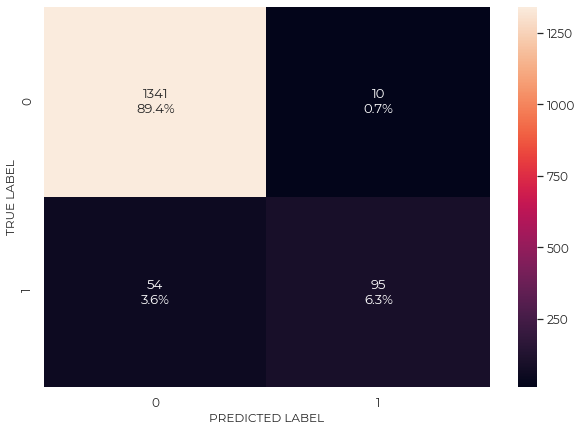

In [468]:
make_confusion_matrix2(lg4,X_test3,y_test)

### Observations on Model Performance 

**Predicting what customer would take the loan**

In the confusion matrix for our predictions on testing data, we made 95 correct predictions and 54 wrong predictions on what cutomers would take the loan. These **True Positive** predictions(95), represent our customers who we predicted would take the loan, and they did. Targeting them would result in campaign dollars well spent.
The 54 **False Negatives** - The actual outcome of this predicted segment represents a huge loss in opportunity, as they are willing clients that we would be ignoring by following the predicted outcomes.

**Predicting what customers would NOT take the loan**

We made 1341 **True Negative** predictions, and 10 **False Positive** predictions on what customers would not take the personal loan. The set of predicted outcomes was more favorable here, which makes sense given we had a much larger set of customers who did not take the loan in our training data set (> 90%). 
In our case, the impact of the True Negative predictions is minimal because by these customers being present in the target category "0", any campaign implemented by All Life Bank would exclude them. Thus no advertising dollars would be wasted, even if we choose to use this prediction. However, the False Positive predictions would be costly if we implemented a campaign based on the current predicted outcomes. This segment represents customers who did not take the personal loan even though we predicted that they would. In other words, wasted advertising dollars. This could be our most costly prediction,since we actually would spend money here. 

Ultimately the impact of our prediction is not fixed and is co-dependent on other strategic components like a business' campaign budgets, target customer acquisition costs, and target revenue per customer, etc. 

**Business Inisight**

As mentioned above, the false negatives are out most costly prediction so All Life would want to focus on reducing the number of wrong predictions here. This can be achieved by maximising the value of the model Recall to minimize the chances of having false negative predictions

### ROC - AUC CURVE

Let's plot the ROC Curve for Training Data

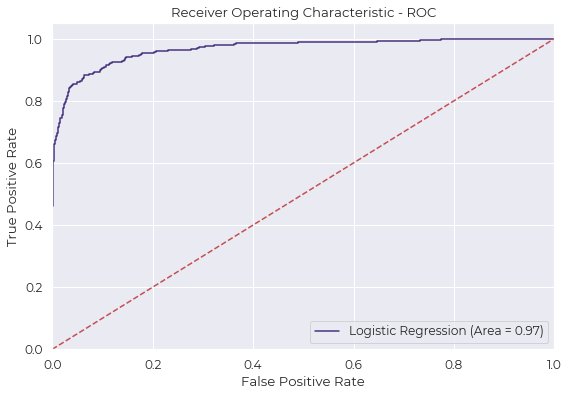

In [469]:
logis_rocauc_train = roc_auc_score(y_train, lg4.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train3))

plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logis_rocauc_train)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic - ROC')
plt.legend(loc="best")

plt.show()

Let's plot the ROC Curve for Testing Data

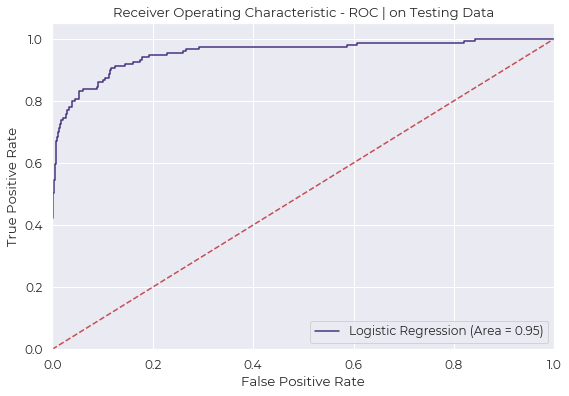

In [470]:
logis_rocauc_train = roc_auc_score(y_test, lg4.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test3))

plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logis_rocauc_train)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic - ROC | on Testing Data')
plt.legend(loc="best")

plt.show()

The model performs better on the training data - unsurprisingly. Overall, the model generalizes well across old and new data

### Model Coefficients and Interpretations

In [471]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.6557
Time:                        22:37:04   Log-Likelihood:                -377.20
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.295e-302
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.2371      0.701    -18.872      0.000     -14.612     -11.862
Income                 0.0632      0.004     16.585      0.000       0.056       0.071
CCAvg               

* The features that interact positively with the target variable (Personal_Loan) are Income, CCAvg, CD_Account, Education Category 2 & 3, and family size 3 & 4. Customers with these features are more likely to take a personal loan.
* Securities Account(having one with the bank), Online (internet banking), and CreditCard(having this with a different bank) interact negatively. Customers with these features are less likely to take a personal loan.

* To further interpret these co-efficients, they require conversion because co-efficients of logistic regression are in the form log(odd).
* The odds (of a customer taking a Personal Loan) is **exp(b)** and the % change in odds (of taking a Personal Loan) based on the relevant feature is **(exp(b)-1) * 100.**
* We'll use these two formulas to get the odds of our features in the final model, to interpret their relevance

### Odds of Model Coefficients

In [286]:
odds = np.exp(lg4.params)
print('\033[1m'+'Feature Odds' + '\033[36m'+'\033[0m')
pd.DataFrame(odds, X_train3.columns, columns=['odds']).T

Feature Odds


,const,Income,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,Family_3,Family_4
odds,0.000002,1.06526,1.266999,0.34416,41.863532,0.554735,0.368245,53.233879,69.1587,11.99674,5.082885


In [288]:
perc_chg = (np.exp(lg4.params)-1)*100 # the percentage change
print('\033[1m'+'Feature Odds - Percent Change' + '\033[36m'+'\033[0m')
pd.DataFrame(perc_chg, X_train3.columns, columns=['Odds - % Change']).T

Feature Odds - Percent Change


,const,Income,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,Family_3,Family_4
Odds - % Change,-99.999822,6.526024,26.699899,-65.583989,4086.353167,-44.526502,-63.175495,5223.387919,6815.869972,1099.673958,408.288476


* With all other features remaining constant, a customer having a securities account with the bank, decreases the odds of them taking a personal loan, by 0.34 times (65 % decrease in  odds)
* All other features remaining constant, a unit change in Income increases the odds of a customer taking a personal loan by 1.07 times (6.5 % increase in odds)
* A unit change in average spending on credit cards per month (CCAvg) increases the odds of taking a personal loan by 1.27 times or a 26.7% decrease in odds)
* All other features remaining constant, a customer having a credit card with a different bank decreases the odds of them taking a personal loan by 0.36 times (63 % decrease in  odds)
* The other co-efficients can be interpreted in the same way but we won't realistcally be able to, or need to use all the coefficients present. 

## Seeking Model Improvements

We'll attempt to use the optimal threshold in our AUC-ROC curve to improve the model scores

In [472]:
#The threshold is optimal when tpr is relatively high and fpr is relatively low

fpr, tpr, thresholds  = metrics.roc_curve(y_train, lg4.predict(X_train3))

optimal_i = np.argmax(tpr - fpr)
opthresh_aucroc = thresholds[optimal_i]
print("Our first test optimal threshold is",opthresh_aucroc)

Our first test optimal threshold is 0.13741975092725905


### Let us make a confusion matrix and print the scores of a model which uses this optimal threshold, to determine what improvements we get, if any.

Model Performance
----------------------------------------
Accuracy on the training set :  0.9309
Accuracy on the test set :  0.9327
----------------------------------------
Recall on the training set :  0.5903
Recall on the  test set :  0.62
----------------------------------------
Precision on the training set :  0.8792
Precision on the test set :  0.8322
----------------------------------------
F1 on the training set :  0.7063
F1 on the test set :  0.7106


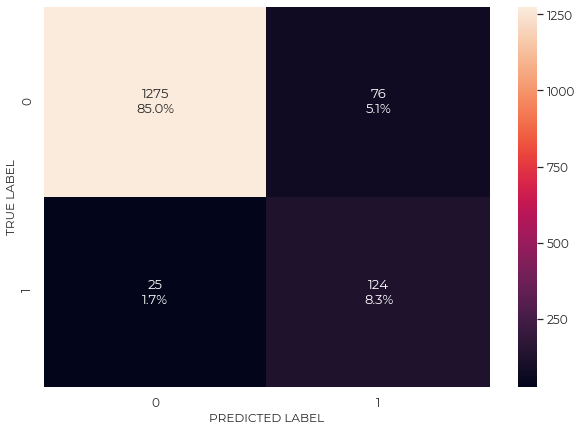

In [473]:

make_confusion_matrix2(lg4,X_test3,y_test, threshold = opthresh_aucroc ) # Print confusion matrix with optimal threshold
scores_LR = print_metrics2(lg4,X_train3,X_test3,y_train,y_test, threshold = opthresh_aucroc) # print scores with optimal threshold

### Attempt to locate a better thershold using Precision - Recall Curve

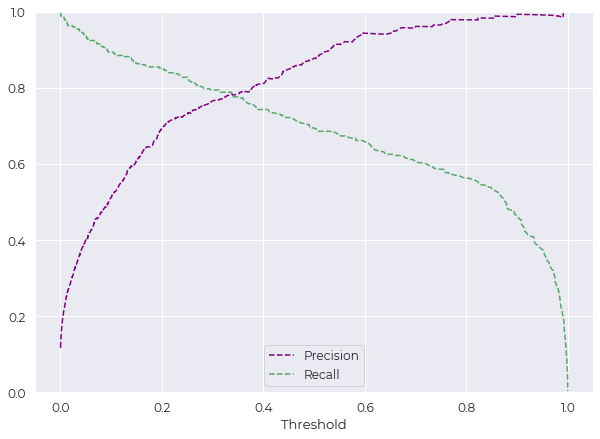

In [474]:
y_scores=lg4.predict(X_train3)

prec, rec, tre = precision_recall_curve(y_train, y_scores)

def plot_prec_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'purple', linestyle='dashed', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    
    plt.xlabel('Threshold')
    plt.legend(loc='best')
    
    plt.ylim([0,1])
    
plt.figure(figsize=(10,7))

plot_prec_recall(prec, rec, tre)
plt.show()

~ 0.34 gives us a high precision and recall so let's test model performance with this threshold 

Model Performance
----------------------------------------
Accuracy on the training set :  0.9583
Accuracy on the test set :  0.9587
----------------------------------------
Recall on the training set :  0.7812
Recall on the  test set :  0.8372
----------------------------------------
Precision on the training set :  0.7764
Precision on the test set :  0.7248
----------------------------------------
F1 on the training set :  0.7788
F1 on the test set :  0.777


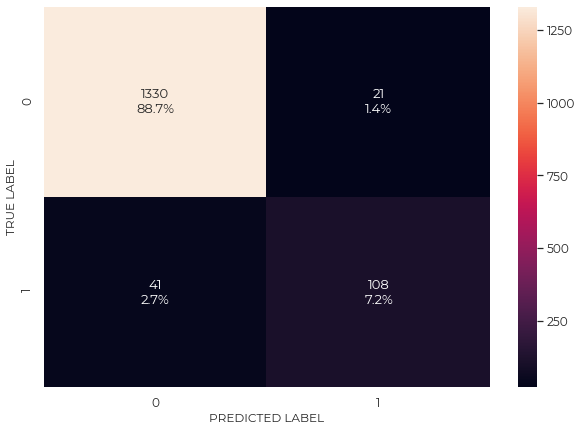

In [475]:
opthresh_precrec = 0.34
make_confusion_matrix2(lg4,X_test3,y_test, threshold = opthresh_precrec ) # Print confusion matrix with 2nd test optimal threshold
scores_LR = print_metrics2(lg4,X_train3,X_test3,y_train,y_test, threshold = opthresh_precrec) # print scores with 2nd test optimal threshold

## Performance Summary

### Original Model

In [476]:
print_metrics2(lg4,X_train3,X_test3,y_train,y_test)  

Model Performance
----------------------------------------
Accuracy on the training set :  0.9617
Accuracy on the test set :  0.9573
----------------------------------------
Recall on the training set :  0.8774
Recall on the  test set :  0.9048
----------------------------------------
Precision on the training set :  0.6918
Precision on the test set :  0.6376
----------------------------------------
F1 on the training set :  0.7736
F1 on the test set :  0.748


### Model with 0.14 Threshold

In [477]:
print_metrics2(lg4,X_train3,X_test3,y_train,y_test,threshold=opthresh_aucroc)

Model Performance
----------------------------------------
Accuracy on the training set :  0.9309
Accuracy on the test set :  0.9327
----------------------------------------
Recall on the training set :  0.5903
Recall on the  test set :  0.62
----------------------------------------
Precision on the training set :  0.8792
Precision on the test set :  0.8322
----------------------------------------
F1 on the training set :  0.7063
F1 on the test set :  0.7106


### Model with 0.34 Threshold

In [478]:
print_metrics2(lg4,X_train3,X_test3,y_train,y_test,threshold=opthresh_precrec)

Model Performance
----------------------------------------
Accuracy on the training set :  0.9583
Accuracy on the test set :  0.9587
----------------------------------------
Recall on the training set :  0.7812
Recall on the  test set :  0.8372
----------------------------------------
Precision on the training set :  0.7764
Precision on the test set :  0.7248
----------------------------------------
F1 on the training set :  0.7788
F1 on the test set :  0.777


* Our threshold of ~0.14 gave us a reduced number of false negatives and the threshold of ~0.34  gave us a much better recall on the test data - ~0.84.

* Our precision reduced from ~0.83 to ~0.73 on test data with the threshold of 0.34. Precision tells us which outcomes we positively predicted, and is important in this scenario.

* We will not go with threshold 0.14 since the Recall is 0.62 and it is important that we maximize recall. This is achieved with threshold 0.34 so we'll choose this threshold. 

* For reference, our original stats model had 0.91 recall and 0.64 precision so we did not have as many positive predicitions of which customers would take the poersonal loan. This is improved with the final model with the 0.34 threshold

# Decision Trees

In [486]:
# returning back to the original cleaned data as we're using a different approach

Xd = d
yd = y

# split into train and test

X_traind, X_testd, y_traind, y_testd = train_test_split(Xd, yd, test_size = 0.3, random_state = 1 )
print(f'The shape of the training dataset is : {X_traind.shape}')
print(f'The shape of the testing dataset is : {X_testd.shape}')

The shape of the training dataset is : (3500, 13)
The shape of the testing dataset is : (1500, 13)


We'll build a model with the DecisionTreeClassifier, splitting with the 'gini' criteria.
The frequency of customers that took the loan is significantly more than those that did not, so we'll need to balance the category weights.
Why : If one category appears much more, the model becomes biased towards that category.

Using the **class_weight** hyperparameter in our decision tree classifier helps minimize the impact of this imbalance which was intially noted in the Logistic Regression approach.

Specifically, we need to pass a dictionary which specifies the weight of each class. Here, we'll give more weighting (85%) to Category 1 : Users who did take the loan 1. Its original weight was close to 10% only.
**Dictionary :  {0:0.15,1:0.85}**

.

## Build a Decision Tree

In [487]:
decmod = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

decmod.fit(X_traind, y_traind)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [498]:
def make_confusion_matrixd( dectreemod,y_actuald,labels =[1, 0]):
    
    y_predictd = dectreemod.predict(X_testd)
    
    cm = metrics.confusion_matrix(y_actuald, y_predictd, labels = [0,1])
    dcm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]] , 
                      columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    countsd = ['{0:0.0f}'.format(val) for val in cm.flatten()]
    percsd = ['{0:.1%}'.format(val) for val in cm.flatten()/np.sum(cm)]
    
    labelsd = [f'{a}\n{b}' for a, b in zip(countsd, percsd)]
    labelsd = np.array(labelsd).reshape(2,2)
    
    plt.figure(figsize = (7,6))
    sns.heatmap(cm, annot = labelsd, fmt = '')
    
    plt.ylabel('TRUE LABEL', fontsize = 12)
    plt.xlabel('PREDICTED LABEL', fontsize = 12)

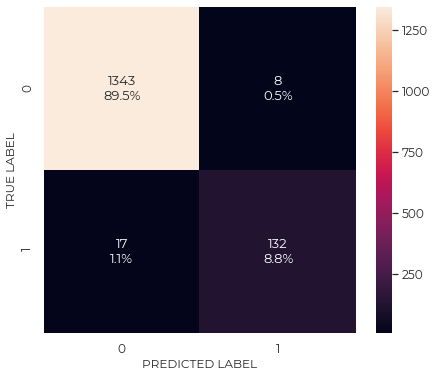

In [499]:
make_confusion_matrixd(decmod,y_testd)

### We have the same objective as in the previous approach so we'll pay attention to the recall

Let's write a funtion to print the model recall

In [390]:
#  Function to calculate recall score
def recall(model):
    '''
    model : classifier to predict values
    '''
    trainpred = model.predict(X_traind)
    testpred = model.predict(X_testd)
    print("Training Recall : ",metrics.recall_score(y_traind,trainpred))
    print("Testing Recall : ",metrics.recall_score(y_testd,testpred))

In [501]:
# call the function with the decision tree model
recall(decmod)

Training Recall :  1.0
Testing Recall :  0.8859060402684564


There is a noticeable difference in performance across training and testing data. we notice the the model has overfitted on our training set and gives a recall of 1.0. 

### Let's vizualize our decision tree

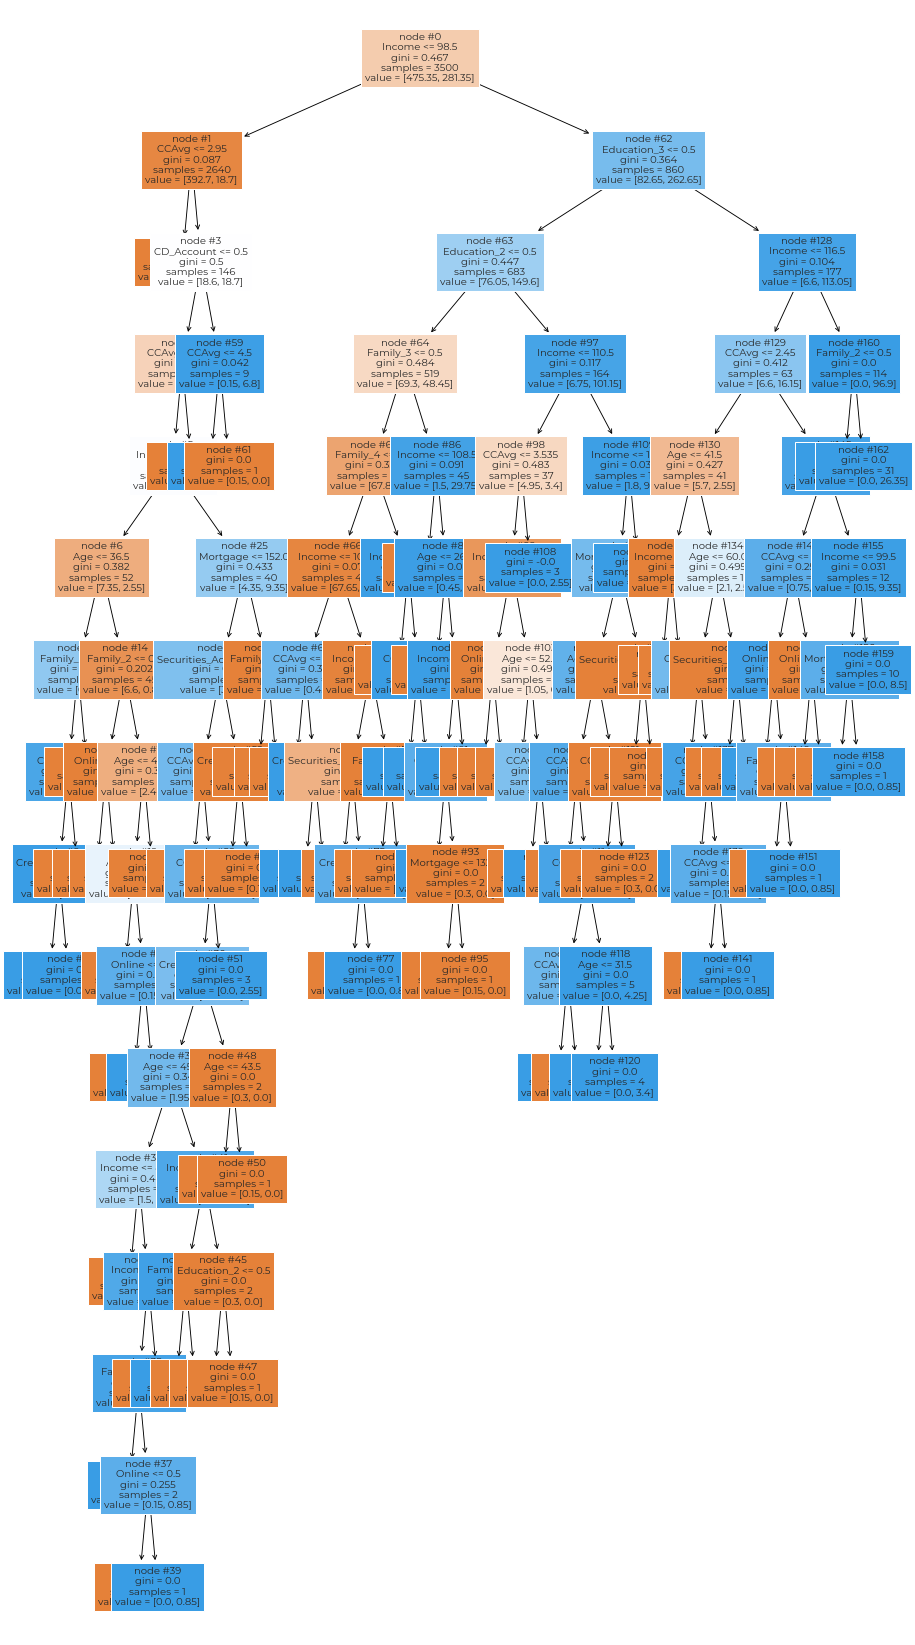

In [514]:
plt.figure(figsize=(15,30))
out = tree.plot_tree(decmod, feature_names=featuresd, filled=True, fontsize=10, node_ids=True, class_names=None)

# Fill in the missing arrows in our decision tree (if any)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(0.9)
plt.show()


Without placing restraints on how deep our tree can go, the classifier built out a tree that is very complex.

The rules  within the decision  tree can be viewed in the text report shown below - It's for viewing only, and we won't be diving in

In [515]:
# print a text report showing the rules within the decision tree

print(tree.export_text(decmod, feature_names=featuresd, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Family_2 <= 0.50
|   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |--- weight

### The Gini Importance of our Features

* This indicates the importance of each feature in the building of our decision tree
* The importance of a feature is computed as the total reduction of the 'criterion' caused by the feature

In [535]:
# Show feature importance

(pd.DataFrame(decmod.feature_importances_, columns = ["Importance"], index = X_traind.columns).sort_values(by = 'Importance', ascending = False))

,Importance
Income,0.597161
CCAvg,0.091851
Education_2,0.088134
Family_4,0.071171
Family_3,0.071046
Education_3,0.035148
Age,0.018401
CD_Account,0.011000
Mortgage,0.005887
Securities_Account,0.004716


Let's visualize the importances in descending order to try and see what matters most

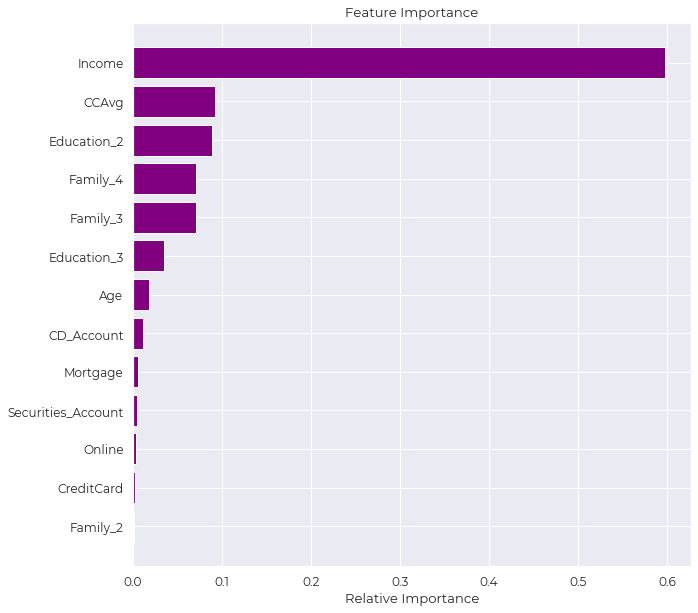

In [532]:
importances = decmod.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importance')

plt.barh(range(len(indices)), importances[indices], color='purple', align='center')

plt.yticks(range(len(indices)), [featuresd[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Based on the output, the most important features in building the decision tree are the income of the customer, the average monthly spending on credit cards, and having a graduate level education

Seeing as we allowed our first tree to run its full course, we'll try to reduce any over fitting that may have occured. 

### Minimize Overfitting in our Model

* We will attempt to reduce overfitting using a GridSearch cross validaton
* This is a post pruning technique that attempts to determine optimal values for our hyperparameters, with hyperparameter tuning
* We provide a set of parameter values to perform an exhaustive search on, and the parameters of our model are optimized by searching within this parameter grid

In [526]:
# import the gridsearch function

from sklearn.model_selection import GridSearchCV

# Specify a classifier type 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to use in finding the optimal values
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# scoring used to compare parameter combinations withinn the grid
scorer = metrics.make_scorer(metrics.recall_score)

# Run search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_traind, y_traind)

# Get the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_traind, y_traind)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=4, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

### Let's visualize the confusion matrix

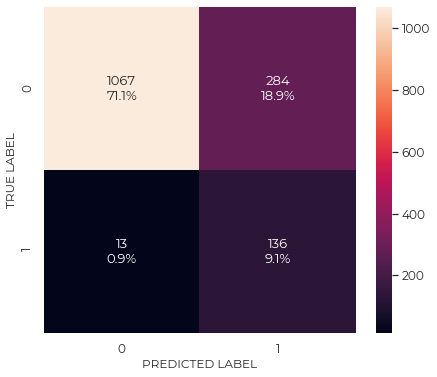

In [527]:
make_confusion_matrixd(estimator,y_testd)

### Get the recall of our pruned model using our previous function

In [528]:
recall(estimator)

Training Recall :  0.9546827794561934
Testing Recall :  0.912751677852349


Our model generalizes much better over training and testing data, though it performs better on training data which is to be expected. Our recall on the test set also improved a bit which is desired to meet our goal of minimizing false negatives.

We can stop here but we'll try to improve for the sake of learning.

Other ways to approach this are to pre-prune by putting constraints in place to limit the size of the tree. Examples are 'max-depth','max_leaf_nodes', and 'min_samples_leaf' which do things like limit the depth of the tree, and allow us to specify a min number of obervations at each tree node.

We will look at cost complexity pruning as another method to see if we can get improvements. 

The tuned decision tree model is shown below:

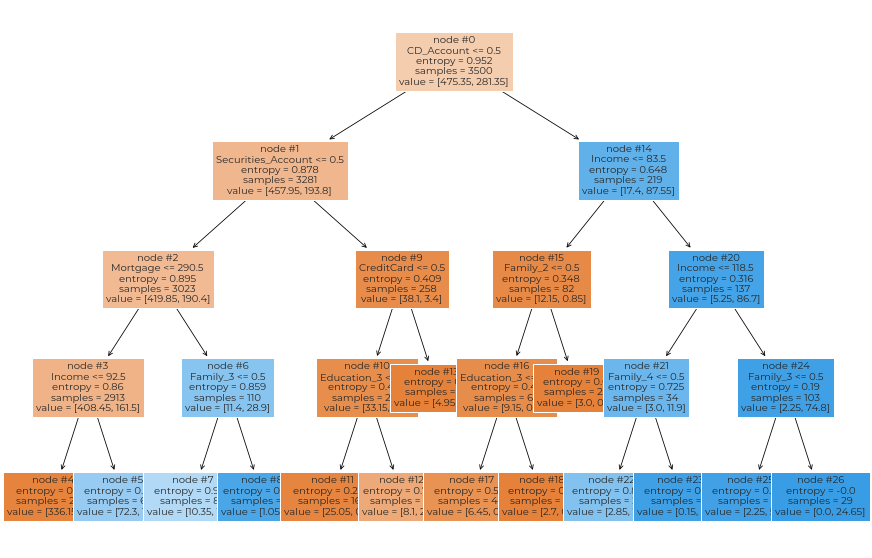

In [529]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator, feature_names=featuresd, filled=True, fontsize=10, node_ids=True, class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(0.8)
plt.show()

These are the new rules within our pruned tree: 

In [531]:
print(tree.export_text(estimator, feature_names=featuresd, show_weights=True))

|--- CD_Account <= 0.50
|   |--- Securities_Account <= 0.50
|   |   |--- Mortgage <= 290.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [336.15, 8.50] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- weights: [72.30, 153.00] class: 1
|   |   |--- Mortgage >  290.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- weights: [10.35, 17.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.05, 11.90] class: 1
|   |--- Securities_Account >  0.50
|   |   |--- CreditCard <= 0.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- weights: [25.05, 0.85] class: 0
|   |   |   |--- Education_3 >  0.50
|   |   |   |   |--- weights: [8.10, 2.55] class: 0
|   |   |--- CreditCard >  0.50
|   |   |   |--- weights: [4.95, 0.00] class: 0
|--- CD_Account >  0.50
|   |--- Income <= 83.50
|   |   |--- Family_2 <= 0.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- weights: [6.45, 0.85] class: 0
|   |   |   |--- Education_3 > 

Let's review the importances

In [536]:
# Show importances of pruned model
print("Pruned Model")
(pd.DataFrame(estimator.feature_importances_, columns = ["Importance"], index = X_traind.columns).sort_values(by = 'Importance', ascending = False).T)

Pruned Model


,Income,CD_Account,Mortgage,Securities_Account,Family_3,Education_3,Family_4,CreditCard,Family_2,Age,CCAvg,Online,Education_2
Importance,0.689672,0.2073,0.056073,0.022821,0.011578,0.007429,0.002576,0.001686,0.000865,0.0,0.0,0.0,0.0


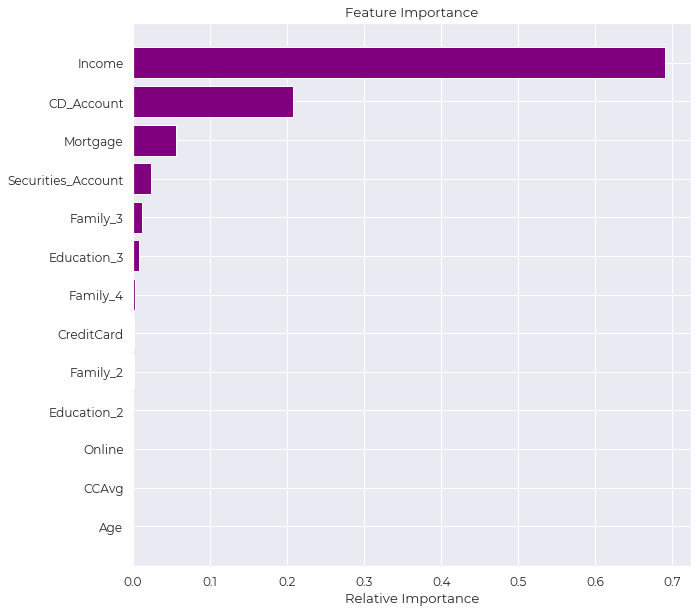

In [557]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importance')

plt.barh(range(len(indices)), importances[indices], color='purple', align='center')

plt.yticks(range(len(indices)), [featuresd[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

The importance of our most important features have improved while the importance of our less important features has reduced. 

### Cost Complexity Pruning

In this pruning technique, the cc_alpha parameter is used to trim nodes from the tree. This pruning method recusively finds nodes to trim by checking for an effective alpha at each node and trimming nodes with the smallest effective alpha.
More nodes are trimmed as alpha is increased, and the maximum value of alpha leaves a tree with only a root node. CC Pruning increases the impurity of the leaves

In [562]:
clf = DecisionTreeClassifier(random_state=1, class_weight = {0:0.15,1:0.85})

path = clf.cost_complexity_pruning_path(X_traind, y_traind)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

pd.DataFrame(path);

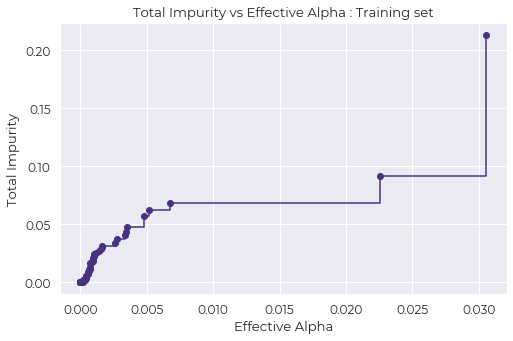

In [563]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")

ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity")

ax.set_title("Total Impurity vs Effective Alpha : Training set")

plt.show()

### Let's look at the last alpha which gives the root node with max total impurity

In [564]:
clfs = [] # to hold our vals

# train decision tree usng effective alphas
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 1, ccp_alpha = alpha, class_weight = {0:0.15,1:0.85})
    clf.fit(X_traind, y_traind)
    clfs.append(clf)
    
print("Nodes in last tree: {}\nCost Complexity Pruning Alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1])) # print last alpha val

Nodes in last tree: 1
Cost Complexity Pruning Alpha: 0.253795714894809


### The impact of ccp_alpha

As alpha increases, more nodes are  trimmed, reducing the depth of the tree and number of nodes.
The plot below illustrates how the tree depth and the node count reduce as alpha is increased .

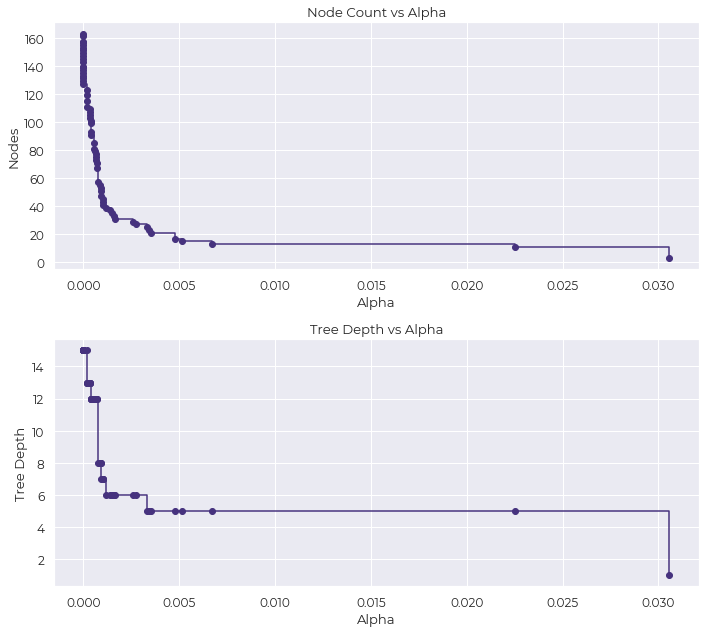

In [565]:
clfs = clfs[:-1]

alphas = ccp_alphas[:-1]

nodes = [clf.tree_.node_count for clf in clfs]

depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1,figsize=(10,9))

ax[0].plot(alphas, nodes, marker='o', drawstyle="steps-post")

ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Nodes")

ax[0].set_title("Node Count vs Alpha")

ax[1].plot(alphas, depth, marker='o', drawstyle="steps-post")

ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Tree Depth")

ax[1].set_title("Tree Depth vs Alpha")
fig.tight_layout()

### Let's look for the model with the best precision and recall

In [616]:
rectraind=[]
for clf in clfs:
    pred_train=clf.predict(X_traind)
    values_train=metrics.recall_score(y_traind,pred_train)
    rectraind.append(values_train)

In [617]:
rectestd=[]
for clf in clfs:
    pred_test=clf.predict(X_testd)
    values_test=metrics.recall_score(y_testd,pred_test)
    rectestd.append(values_test)

In [618]:
idx_best = np.argmax(rectestd)
best = clfs[idx_best]
print(best)

DecisionTreeClassifier(ccp_alpha=0.006725813690406613,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


The alpha in this model is ~ 0.007

### Confusion Matrix of Our Best Model

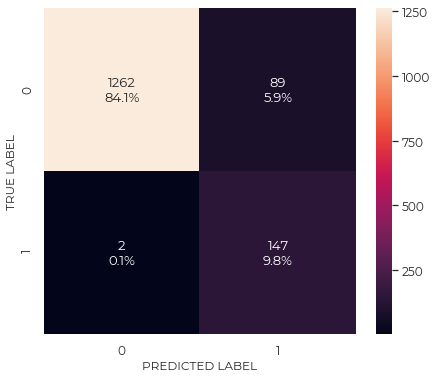

In [593]:
make_confusion_matrixd(best_model,y_testd)

We can see this model has the lowest number of false negatives and we have the highest number of true positives - 2. We should expect the recall to be very high.

The recall on this best model is...

In [622]:
recall(best)

Training Recall :  0.9909365558912386
Testing Recall :  0.9865771812080537


The recall on testing data for this model is 0.986... and it generalizes well on training and testing data.
Overall this model give us the highest correct predicitions of who will take the loan and minimizes our error missed opportunities thus maxmizing our gain all around.

Let's visualize the tree

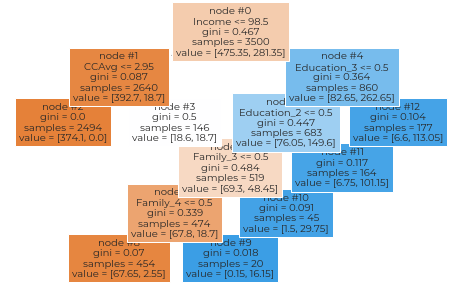

In [621]:
plt.figure(figsize=(8,5))

out = tree.plot_tree(best, feature_names = featuresd, filled = True, fontsize = 10, node_ids = True, class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(0.8)
plt.show()

Here are the decision rules within the tree : 

In [623]:
print(tree.export_text(best, feature_names=featuresd, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



This tree is more manageable and also not pruned to the point where we lose majority of the valuable info present in the data

### Let's review the importances 

In [625]:
# Show feature importance of best model

(pd.DataFrame(best.feature_importances_, columns = ["Importance"], index = X_traind.columns).sort_values(by = 'Importance', ascending = False))

,Importance
Income,0.636685
Education_2,0.103283
Family_3,0.082412
Family_4,0.079906
CCAvg,0.056525
Education_3,0.041189
Age,0.000000
Mortgage,0.000000
Securities_Account,0.000000
CD_Account,0.000000


Visualize the importances

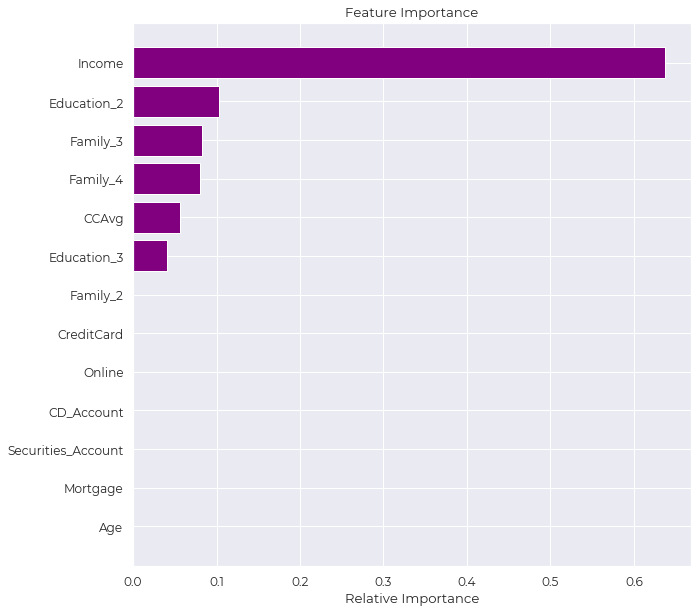

In [626]:
importances = best.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importance')

plt.barh(range(len(indices)), importances[indices], color='purple', align='center')

plt.yticks(range(len(indices)), [featuresd[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

We notice Income has remained the top most important feature all through our experimentation. Let's review our models

### Model Review

In [631]:
dframe = pd.DataFrame({'Model':['Initial Decision Tree','Hyperparameter Tuned Model','Cost Complexity Pruning (CCP)'], 
                       'Training Recall':[1, 0.954,0.990], 'Testing Recall':[0.886,0.913,0.986]}) 
dframe

,Model,Training Recall,Testing Recall
0,Initial Decision Tree,1.000,0.886
1,Hyperparameter Tuned Model,0.954,0.913
2,Cost Complexity Pruning (CCP),0.990,0.986


If we go with the model that has the best score, the CCP model would be chosen, but a score of 0.913 on the Hypertuned Model could be more realistic

# Recap

We analyzed the customer data for All Life Bank to predict what customers would take the personal loan. Our EDA gave some good insights that helped us clean our data to a point where we could model. We decided not to treat outliers during or post-EDA,as we would have interfered with the natural outlier occurrence observed in actual bank customers. Some people have sigificantly higher incomes, varied family sizes, different spending habits etc.

Out target Variable was Personal Loan, and a limitation we faced was the significantly higher number of customers that did not take the loan. We used sklearn to build a model and then used stats model to check summaries which enabled us to detect Multicollinearity by way of high VIF scores. Columns with high VIF scores were dropped, causing columns like family size 2 and mortgage to be dropped.

We settled on a model that predicts decently well, maximizing the recall which puts us in the best position to minimize our missed opportunities to earn interest loan from customers. We looked at model odds, interpreted some of them, and then sought improvements using the optimal threshold in our AUC-ROC curve. The precision-recall curve helped us find the best threshold to use if we chose to use the Logistic Regression Model.

We then revisited the original cleaned data to build a decision tree using the gini impurity as our criterion. Without specifying any boundaries in our tree, or performing any pre-pruning, our first tree grew large, complex, and was not useful. We noticed a perfect recall of 1.0 and an overfitted model.

Our next step was to specify parameters for a gridsearch cross validation search which allowed us to optimize the parameters of our model. We also sought to maximize the recall here and ended up with a very high scoring model using cost complexity pruning. The importance on the model evolved as we tested, but we saw that the less important features became less relevant while the more important features had increasing importance scores - showing a model biased toward the most important features - this is desired in a model.

The key difference here is that in the Logistic Regression, we accepted the imbalanced weights of customers who did not take the loan but in the decision tree, we were able to factor this in using the 'class-weights' parameter. For this reason, we got a lot more positive predictions in this approach, as the imbalance in samples of target variable category 0, was accounted for. For this reason, the decision tree model will be more useful in achieving our goals for the campaign and will be used.


# Insights

The most important features in our Decision Tree Model are Income, Having Graduate Level Education, Family Size 3 and 4, and Average spending on credit card. In terms of relative importance, Income is by the far the most important. 

* Customers who don't have a credit card with another bank contribute more to the group of users that took the personal loan than those that do. However, the proportion of users that took the loan previously is similar across those that do and those that don't have a credit card with a different bank

* A very small portion of customers that took the previous loan offer also have a securities account with the bank. Overall, of those that did take the personal loan previously, majority do not have a securities account. Our model showed that this impacted the odds of taking a loan negatively.

* As supported by Initial EDA, customers with Graduate and advanced level education have higher odds of taking a loan.


## Analysis of prediction

We will create a dataframe copy and add our actual and predicted values to it so we can plot a cross tab to analyze

### Best Model

In [683]:
predclass = X_testd.copy() 
y_predictd = best.predict(X_testd)

In [685]:
# create columns
predclass['Actual'] = y_testd
predclass['Predicted'] = y_predictd

In [691]:
#create crosstabs
pd.crosstab(predclass['Actual'], predclass['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1262,89,1351
1,2,147,149
All,1264,236,1500


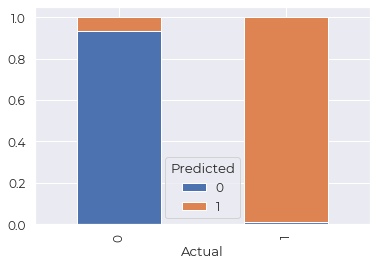

In [689]:
tabz = pd.crosstab(predclass['Actual'], predclass['Predicted'], normalize = 'index')
tabz.plot(kind = "bar",stacked = True, figsize = (6,4))

This model shows only 2 missed opportunities and lots of positive outcomes and the crosstab shows this as well because we focused on maximizing recall.